# After using the feature selection methods to determine the most relevant features this notebook analyzes the individual correlation of each feature to its corresponding target variable and also performs some OLS modeling to asses significance and calculate predicted values. 

In [40]:
import pandas as pd
import seaborn
import pylab as pl
import statsmodels.formula.api as smf
from sklearn import datasets
from sklearn.decomposition import PCA
import geopandas as gp
import urllib

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("all_data_modeling.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'zipcode', 'drug_change_area', 'larceny_change_area',
       'robbery_change_area', 'drug_change_pop', 'larceny_change_pop',
       'robbery_change_pop', 'drug_change_rate', 'petit_larceny_change_rate',
       'robbery_change_rate', 'SS_change_rate', 'H_change_rate',
       'N_change_rate', 'T_change_rate', 'PHS_change_rate', 'VP_change_rate',
       'SS_change_pop', 'H_change_pop', 'N_change_pop', 'T_change_pop',
       'PHS_change_pop', 'VP_change_pop', 'SS_change_area', 'H_change_area',
       'N_change_area', 'T_change_area', 'PHS_change_area', 'VP_change_area',
       'MasterCard_growth_rank', 'pv_change_area', 'sub_change_area',
       'taxi_change_area', 'fhv_change_area', 'log_fhv_taxi_change',
       'renovation_index_with_rent', 'business_renewal', 'rent_increase',
       'new_building_tbp', 'major_renovation_tbp'],
      dtype='object')

# First for gentrification Index using only selected features after LSVC, Random Forest and Gradient Boosting

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Master Card Growth Rank')

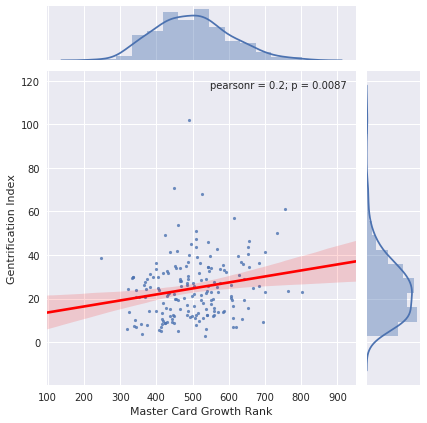

In [6]:
a = seaborn.jointplot("MasterCard_growth_rank", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("Master Card Growth Rank")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Robbery per square mile')

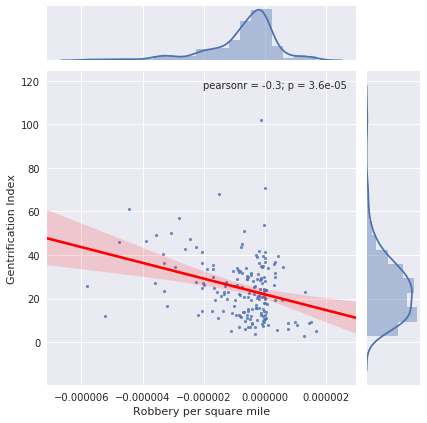

In [8]:
a = seaborn.jointplot("robbery_change_area", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("Robbery per square mile")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Vehicles Parking Complaints per square mile')

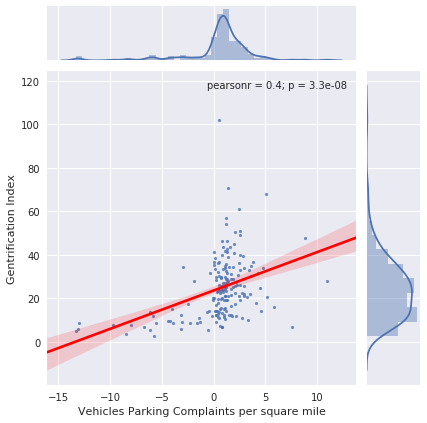

In [9]:
a = seaborn.jointplot("VP_change_area", "renovation_index_with_rent", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Gentrification Index")
pl.xlabel("Vehicles Parking Complaints per square mile")

# Now for Business Renewal using only selected features after LSVC, Random Forest and Gradient Boosting

In [10]:
df.columns

Index(['Unnamed: 0', 'zipcode', 'drug_change_area', 'larceny_change_area',
       'robbery_change_area', 'drug_change_pop', 'larceny_change_pop',
       'robbery_change_pop', 'drug_change_rate', 'petit_larceny_change_rate',
       'robbery_change_rate', 'SS_change_rate', 'H_change_rate',
       'N_change_rate', 'T_change_rate', 'PHS_change_rate', 'VP_change_rate',
       'SS_change_pop', 'H_change_pop', 'N_change_pop', 'T_change_pop',
       'PHS_change_pop', 'VP_change_pop', 'SS_change_area', 'H_change_area',
       'N_change_area', 'T_change_area', 'PHS_change_area', 'VP_change_area',
       'MasterCard_growth_rank', 'pv_change_area', 'sub_change_area',
       'taxi_change_area', 'fhv_change_area', 'log_fhv_taxi_change',
       'renovation_index_with_rent', 'business_renewal', 'rent_increase',
       'new_building_tbp', 'major_renovation_tbp'],
      dtype='object')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Master Card Growth Rank')

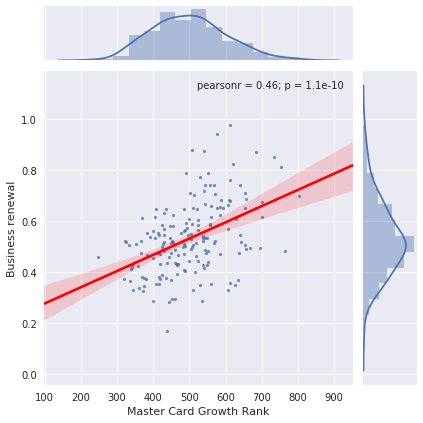

In [11]:
a = seaborn.jointplot("MasterCard_growth_rank", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Business renewal")
pl.xlabel("Master Card Growth Rank")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Noise Complaints per square mile')

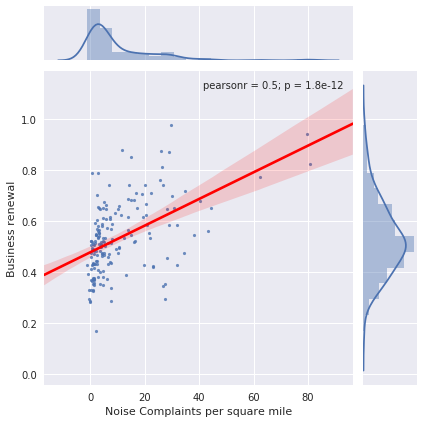

In [12]:
a = seaborn.jointplot("N_change_area", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Business renewal")
pl.xlabel("Noise Complaints per square mile")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Home complaints by area')

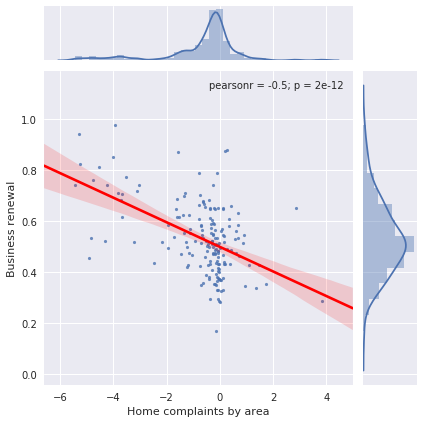

In [13]:
a = seaborn.jointplot("H_change_area", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Business renewal")
pl.xlabel("Home complaints by area")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Transportation complaints per square mile')

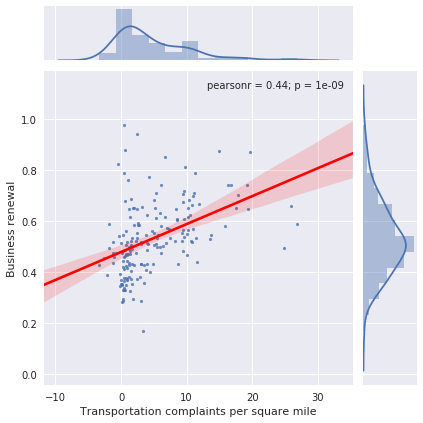

In [14]:
a = seaborn.jointplot("T_change_area", "business_renewal", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Business renewal")
pl.xlabel("Transportation complaints per square mile")

# Now rent increase using only selected features after LSVC, Random Forest and Gradient Boosting

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Transportation complaints per square mile')

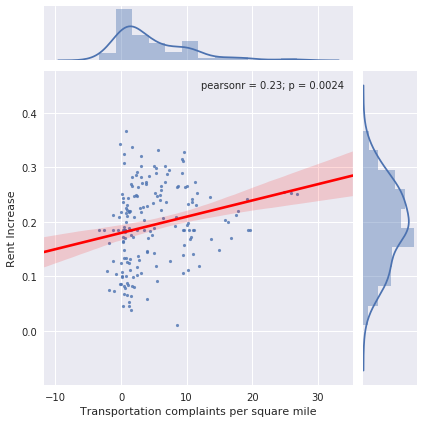

In [15]:
a = seaborn.jointplot("T_change_area", "rent_increase", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Rent Increase")
pl.xlabel("Transportation complaints per square mile")

# Now new building permits normalized by total permits using only selected features after LSVC, Random Forest and Gradient Boosting

In [16]:
df.columns

Index(['Unnamed: 0', 'zipcode', 'drug_change_area', 'larceny_change_area',
       'robbery_change_area', 'drug_change_pop', 'larceny_change_pop',
       'robbery_change_pop', 'drug_change_rate', 'petit_larceny_change_rate',
       'robbery_change_rate', 'SS_change_rate', 'H_change_rate',
       'N_change_rate', 'T_change_rate', 'PHS_change_rate', 'VP_change_rate',
       'SS_change_pop', 'H_change_pop', 'N_change_pop', 'T_change_pop',
       'PHS_change_pop', 'VP_change_pop', 'SS_change_area', 'H_change_area',
       'N_change_area', 'T_change_area', 'PHS_change_area', 'VP_change_area',
       'MasterCard_growth_rank', 'pv_change_area', 'sub_change_area',
       'taxi_change_area', 'fhv_change_area', 'log_fhv_taxi_change',
       'renovation_index_with_rent', 'business_renewal', 'rent_increase',
       'new_building_tbp', 'major_renovation_tbp'],
      dtype='object')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Master Card')

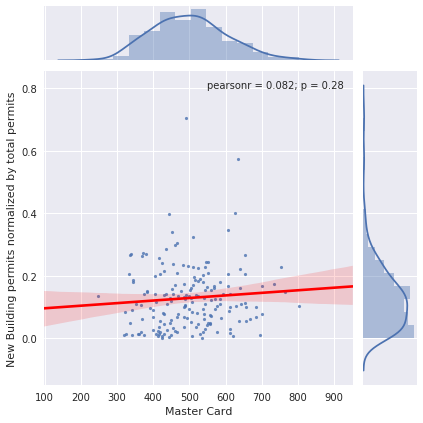

In [19]:
a = seaborn.jointplot("MasterCard_growth_rank", "new_building_tbp", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("New Building permits normalized by total permits")
pl.xlabel("Master Card")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Noise complaints per square mile')

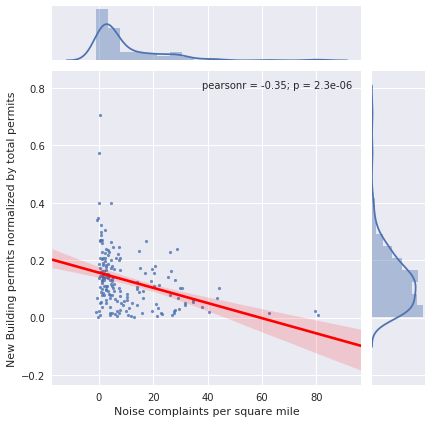

In [20]:
a = seaborn.jointplot("N_change_area", "new_building_tbp", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("New Building permits normalized by total permits")
pl.xlabel("Noise complaints per square mile")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Transportation complaints per square mile')

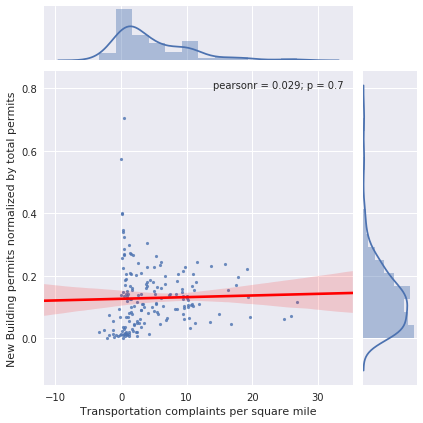

In [21]:
a = seaborn.jointplot("T_change_area", "new_building_tbp", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("New Building permits normalized by total permits")
pl.xlabel("Transportation complaints per square mile")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Taxi trips per square mile')

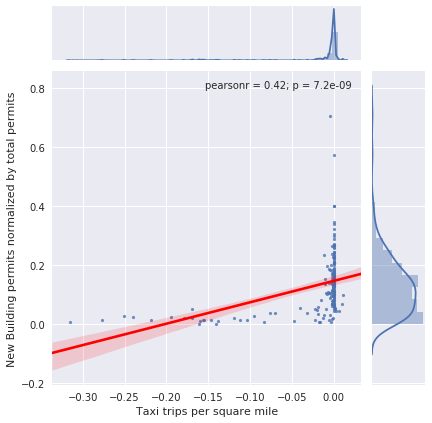

In [22]:
a = seaborn.jointplot("taxi_change_area", "new_building_tbp", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("New Building permits normalized by total permits")
pl.xlabel("Taxi trips per square mile")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Vehicles parking per capita')

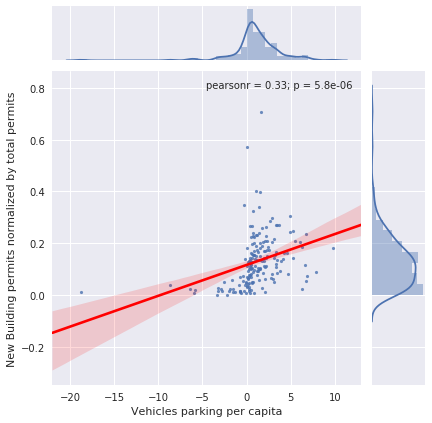

In [18]:
a = seaborn.jointplot("VP_change_pop", "new_building_tbp", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("New Building permits normalized by total permits")
pl.xlabel("Vehicles parking per capita")

# Now major renovation permits normalized by total permits using only selected features after LSVC, Random Forest and Gradient Boosting

In [23]:
df.columns

Index(['Unnamed: 0', 'zipcode', 'drug_change_area', 'larceny_change_area',
       'robbery_change_area', 'drug_change_pop', 'larceny_change_pop',
       'robbery_change_pop', 'drug_change_rate', 'petit_larceny_change_rate',
       'robbery_change_rate', 'SS_change_rate', 'H_change_rate',
       'N_change_rate', 'T_change_rate', 'PHS_change_rate', 'VP_change_rate',
       'SS_change_pop', 'H_change_pop', 'N_change_pop', 'T_change_pop',
       'PHS_change_pop', 'VP_change_pop', 'SS_change_area', 'H_change_area',
       'N_change_area', 'T_change_area', 'PHS_change_area', 'VP_change_area',
       'MasterCard_growth_rank', 'pv_change_area', 'sub_change_area',
       'taxi_change_area', 'fhv_change_area', 'log_fhv_taxi_change',
       'renovation_index_with_rent', 'business_renewal', 'rent_increase',
       'new_building_tbp', 'major_renovation_tbp'],
      dtype='object')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Public Health and Safety complaints per capita')

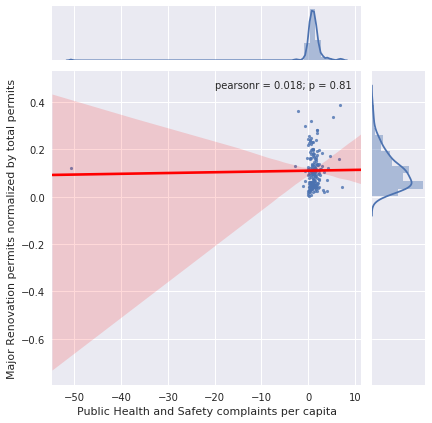

In [25]:
a = seaborn.jointplot("PHS_change_pop", "major_renovation_tbp", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Major Renovation permits normalized by total permits")
pl.xlabel("Public Health and Safety complaints per capita")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Vehicles parking complaints per capita')

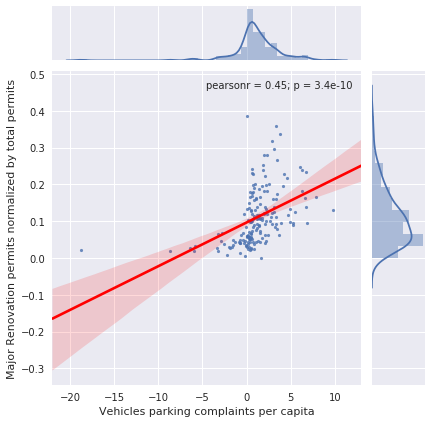

In [26]:
a = seaborn.jointplot("VP_change_pop", "major_renovation_tbp", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Major Renovation permits normalized by total permits")
pl.xlabel("Vehicles parking complaints per capita")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Noise complaints per square mile')

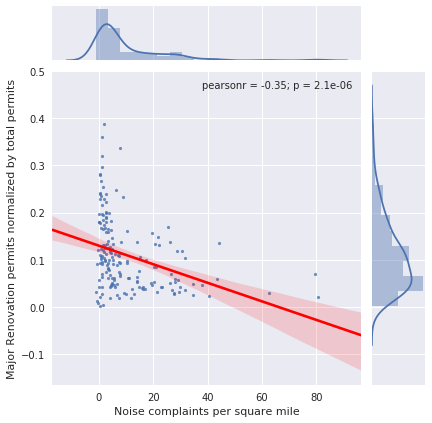

In [27]:
a = seaborn.jointplot("N_change_area", "major_renovation_tbp", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Major Renovation permits normalized by total permits")
pl.xlabel("Noise complaints per square mile")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'Transportation complaints per square mile')

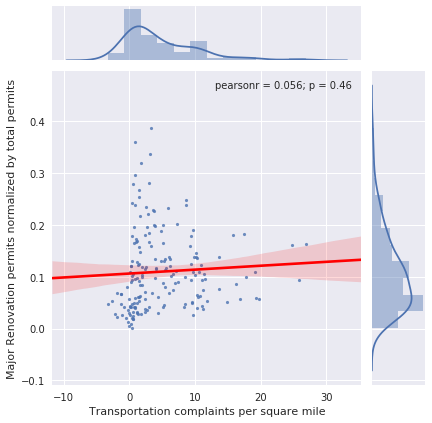

In [28]:
a = seaborn.jointplot("T_change_area", "major_renovation_tbp", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Major Renovation permits normalized by total permits")
pl.xlabel("Transportation complaints per square mile")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,33,'taxi trips per square mile')

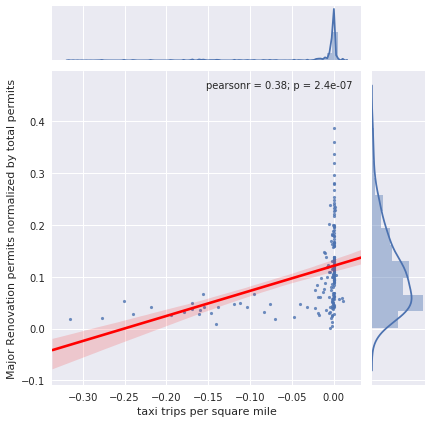

In [24]:
a = seaborn.jointplot("taxi_change_area", "major_renovation_tbp", data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Major Renovation permits normalized by total permits")
pl.xlabel("taxi trips per square mile")

# Now we will try to assign a gentrification value to each zip code based only on the significant features (We do it just for the gentrification index and Business Renewal (The target variable with the highest R squared)

# First for index renewal

In [31]:
lm1 = smf.ols('business_renewal ~  MasterCard_growth_rank + N_change_area + H_change_area + T_change_area',data=df).fit()


lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       business_renewal   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     47.95
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           4.37e-27
Time:                        14:06:28   Log-Likelihood:                 164.55
No. Observations:                 178   AIC:                            -319.1
Df Residuals:                     173   BIC:                            -303.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  0.2799      0.037      7.469      0.000         0.206     0.354
MasterCard_growth_rank     0.0003   7.81e-05      4.160      0.000         0.000     0.000
N_change_area              0.0032      0.001      5.011      0.000         0.002     0.004
H_change_area             -0.0231      0.006     -3.908      0.000        -0.035    -0.011
T_change_area              0.0084      0.001      6.155      0.000         0.006     0.011
==============================================================================
Omnibus:                       20.770   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.743
Skew:                           0.456   Prob(JB):                     5.81e-12
Kurtosis:                       5.479   Cond. No.                     2.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
lm1.params

Intercept                 0.279860
MasterCard_growth_rank    0.000325
N_change_area             0.003224
H_change_area            -0.023147
T_change_area             0.008391
dtype: float64

In [66]:
df.columns

Index(['Unnamed: 0', 'zipcode', 'drug_change_area', 'larceny_change_area',
       'robbery_change_area', 'drug_change_pop', 'larceny_change_pop',
       'robbery_change_pop', 'drug_change_rate', 'petit_larceny_change_rate',
       'robbery_change_rate', 'SS_change_rate', 'H_change_rate',
       'N_change_rate', 'T_change_rate', 'PHS_change_rate', 'VP_change_rate',
       'SS_change_pop', 'H_change_pop', 'N_change_pop', 'T_change_pop',
       'PHS_change_pop', 'VP_change_pop', 'SS_change_area', 'H_change_area',
       'N_change_area', 'T_change_area', 'PHS_change_area', 'VP_change_area',
       'MasterCard_growth_rank', 'pv_change_area', 'sub_change_area',
       'taxi_change_area', 'fhv_change_area', 'log_fhv_taxi_change',
       'renovation_index_with_rent', 'business_renewal', 'rent_increase',
       'new_building_tbp', 'major_renovation_tbp',
       'predicted_business_renewal'],
      dtype='object')

In [65]:
df["predicted_business_renewal"] = lm1.params.iloc[0] + (lm1.params.iloc[1] * df.MasterCard_growth_rank) + (lm1.params.iloc[2] * df.N_change_area) + (lm1.params.iloc[3] * df.H_change_area) + (lm1.params.iloc[4] * df.T_change_area)





In [67]:
zipcodes = gp.GeoDataFrame.from_file("ZIP_CODE_040114.shp")

In [68]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/fedhere/choroplethNYC/master/choroplethNYC.py","choroplethNYC.py")

import choroplethNYC as cp

In [69]:
zipcodes.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [70]:
zipcode = zipcodes[["ZIPCODE", "geometry"]]

In [71]:
zipcode.ZIPCODE = zipcode.ZIPCODE.astype(float)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [72]:
data = pd.merge(df, zipcode, right_on = "ZIPCODE", left_on = "zipcode")

In [73]:
data.head()

,Unnamed: 0,zipcode,drug_change_area,larceny_change_area,robbery_change_area,drug_change_pop,larceny_change_pop,robbery_change_pop,drug_change_rate,petit_larceny_change_rate,...,fhv_change_area,log_fhv_taxi_change,renovation_index_with_rent,business_renewal,rent_increase,new_building_tbp,major_renovation_tbp,predicted_business_renewal,ZIPCODE,geometry
0,0,10001,-0.000007,-7.715676e-05,-9.553277e-07,-0.005399,-0.061259,-0.000758,-0.478261,-0.402994,...,-0.000070,-1.376286,12.446914,0.533825,0.117905,0.050109,0.037876,0.469140,10001.0,"POLYGON ((981958.6472873986 213464.4530421346,..."
1,1,10002,0.000002,8.751860e-07,-4.946703e-07,0.000787,0.000283,-0.000160,0.205788,0.027545,...,0.006078,2.194057,10.818387,0.473819,0.128549,0.055533,0.048182,0.573246,10002.0,"POLYGON ((991339.8703228086 207576.7837151289,..."
2,2,10003,-0.000009,-2.117338e-05,-8.366383e-07,-0.002541,-0.005888,-0.000233,-0.614719,-0.178030,...,0.031182,1.403509,6.758775,0.420635,0.165324,0.012487,0.041865,0.496439,10003.0,"POLYGON ((989830.469142139 207048.1263078749, ..."
3,3,10004,0.000006,1.773882e-05,1.499055e-06,0.011431,0.032465,0.002743,5.000000,0.572581,...,0.004811,3.696351,9.302646,0.496063,0.160638,0.010390,0.021935,0.491682,10004.0,"POLYGON ((981197.408652395 196571.0816452205, ..."
4,3,10004,0.000006,1.773882e-05,1.499055e-06,0.011431,0.032465,0.002743,5.000000,0.572581,...,0.004811,3.696351,9.302646,0.496063,0.160638,0.010390,0.021935,0.491682,10004.0,"POLYGON ((972696.8446168154 193014.5477478057,..."


In [74]:
data_ = gp.GeoDataFrame(data)

# First we map the predicted values

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


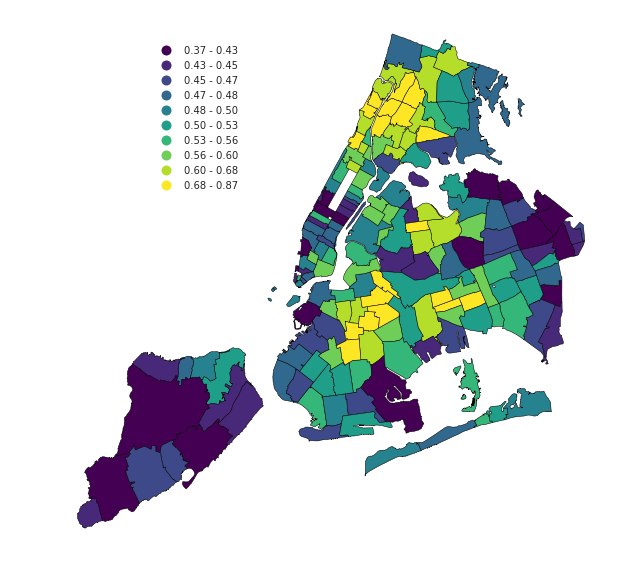

In [75]:
cp.choroplethNYC(data_, column="predicted_business_renewal", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme = "QUANTILES");


# Now we map the actual values

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


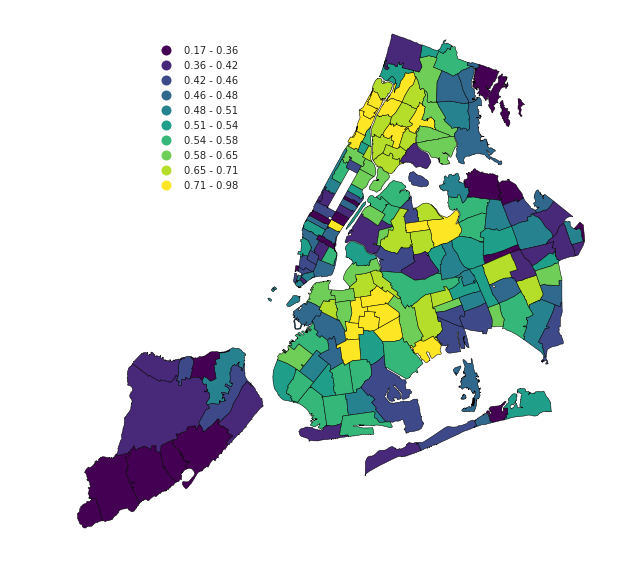

In [76]:
cp.choroplethNYC(data_, column="business_renewal", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme = "QUANTILES");


# It looks like a good approximation

# Now for Gentrification Index

In [77]:
df.columns

Index(['Unnamed: 0', 'zipcode', 'drug_change_area', 'larceny_change_area',
       'robbery_change_area', 'drug_change_pop', 'larceny_change_pop',
       'robbery_change_pop', 'drug_change_rate', 'petit_larceny_change_rate',
       'robbery_change_rate', 'SS_change_rate', 'H_change_rate',
       'N_change_rate', 'T_change_rate', 'PHS_change_rate', 'VP_change_rate',
       'SS_change_pop', 'H_change_pop', 'N_change_pop', 'T_change_pop',
       'PHS_change_pop', 'VP_change_pop', 'SS_change_area', 'H_change_area',
       'N_change_area', 'T_change_area', 'PHS_change_area', 'VP_change_area',
       'MasterCard_growth_rank', 'pv_change_area', 'sub_change_area',
       'taxi_change_area', 'fhv_change_area', 'log_fhv_taxi_change',
       'renovation_index_with_rent', 'business_renewal', 'rent_increase',
       'new_building_tbp', 'major_renovation_tbp',
       'predicted_business_renewal'],
      dtype='object')

In [80]:
lm2 = smf.ols('renovation_index_with_rent ~  MasterCard_growth_rank + VP_change_area + robbery_change_pop',data=df).fit()


lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     renovation_index_with_rent   R-squared:                       0.203
Model:                                    OLS   Adj. R-squared:                  0.189
Method:                         Least Squares   F-statistic:                     14.74
Date:                        Mon, 23 Jul 2018   Prob (F-statistic):           1.36e-08
Time:                                14:30:16   Log-Likelihood:                -704.19
No. Observations:                         178   AIC:                             1416.
Df Residuals:                             174   BIC:                             1429.
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 12.7171      4.858      2.618      0.010         3.128    22.306
MasterCard_growth_rank     0.0189      0.010      1.949      0.053        -0.000     0.038
VP_change_area             1.4633      0.322      4.547      0.000         0.828     2.098
robbery_change_pop     -3180.0461   1603.509     -1.983      0.049     -6344.879   -15.213
==============================================================================
Omnibus:                       89.496   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              533.286
Skew:                           1.797   Prob(JB):                    1.58e-116
Kurtosis:                      10.681   Cond. No.                     8.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
data_["predicted_gentrification_index"] = lm2.params.iloc[0] + (lm2.params.iloc[1] * df.MasterCard_growth_rank) + (lm2.params.iloc[2] * df.VP_change_area) + (lm2.params.iloc[3] * df.robbery_change_pop)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


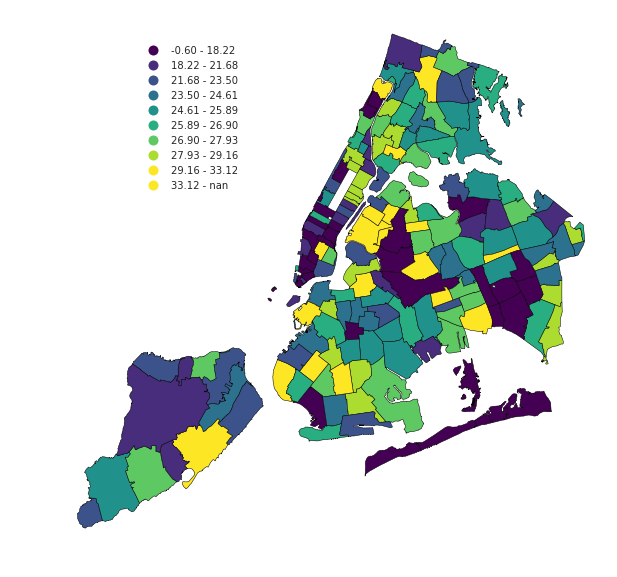

In [82]:
cp.choroplethNYC(data_, column="predicted_gentrification_index", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme = "QUANTILES");


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


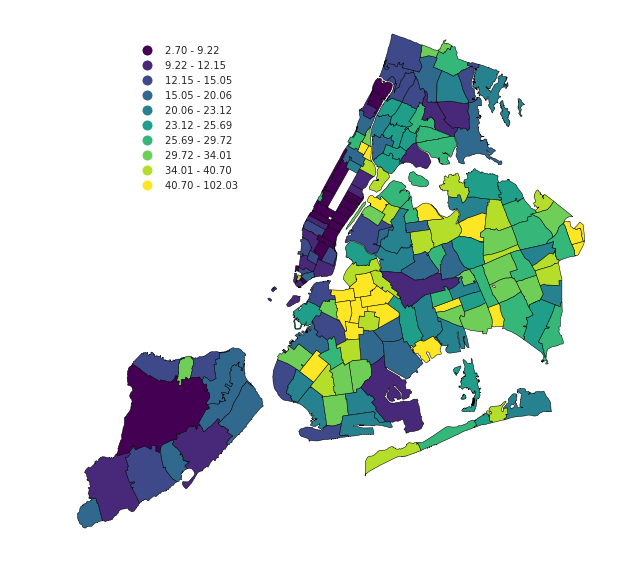

In [83]:
cp.choroplethNYC(data_, column="renovation_index_with_rent", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme = "QUANTILES");


# Not as good as for business renewal

# This is just one little extra step renaming the variables so that they are included with needed names in the website and export the data

In [84]:
df.columns

Index(['Unnamed: 0', 'zipcode', 'drug_change_area', 'larceny_change_area',
       'robbery_change_area', 'drug_change_pop', 'larceny_change_pop',
       'robbery_change_pop', 'drug_change_rate', 'petit_larceny_change_rate',
       'robbery_change_rate', 'SS_change_rate', 'H_change_rate',
       'N_change_rate', 'T_change_rate', 'PHS_change_rate', 'VP_change_rate',
       'SS_change_pop', 'H_change_pop', 'N_change_pop', 'T_change_pop',
       'PHS_change_pop', 'VP_change_pop', 'SS_change_area', 'H_change_area',
       'N_change_area', 'T_change_area', 'PHS_change_area', 'VP_change_area',
       'MasterCard_growth_rank', 'pv_change_area', 'sub_change_area',
       'taxi_change_area', 'fhv_change_area', 'log_fhv_taxi_change',
       'renovation_index_with_rent', 'business_renewal', 'rent_increase',
       'new_building_tbp', 'major_renovation_tbp',
       'predicted_business_renewal'],
      dtype='object')

In [92]:
final_data_ws = df[["zipcode","renovation_index_with_rent", "business_renewal", "rent_increase", "new_building_tbp", "major_renovation_tbp", "robbery_change_pop", "MasterCard_growth_rank", "taxi_change_area", "N_change_area", "H_change_area", "T_change_area", "VP_change_pop"]]
                  
                  
                  

In [93]:
final_data_ws.rename(columns={"renovation_index_with_rent":'Gentrification_index'}, inplace=True)
final_data_ws.rename(columns={"new_building_tbp":'New_building_permits_over_total_permits'}, inplace=True)
final_data_ws.rename(columns={"major_renovation_tbp":'Major_renovation_permits_over_total_permits'}, inplace=True)
final_data_ws.rename(columns={"rent_increase":'Rent_increase'}, inplace=True)
final_data_ws.rename(columns={"business_renewal":'Business_renewal_index'}, inplace=True)
final_data_ws.rename(columns={"robbery_change_pop":'Robbery_per_capita_change'}, inplace=True)
final_data_ws.rename(columns={"MasterCard_growth_rank":'Commercial_activity_growth'}, inplace=True)
final_data_ws.rename(columns={"taxi_change_area":'Taxi_pick_ups_change_per_square_mile'}, inplace=True)
final_data_ws.rename(columns={"N_change_area":'Noise_complaints_change_per_square_mile'}, inplace=True)
final_data_ws.rename(columns={"H_change_area":'Home_complaints_change_per_square_mile'}, inplace=True)
final_data_ws.rename(columns={"T_change_area":'Transportation_complaints_change_per_square_mile'}, inplace=True)
final_data_ws.rename(columns={"VP_change_pop":'Vehicle_parking_complaints_change_per_capita'}, inplace=True)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [94]:
final_data_ws.to_csv('website_data.csv')